In [1]:
#This is the notebook for ML_Ex7_2: Principle component analysis (PCA)

In [2]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from scipy import optimize as opt
import scipy.io
import random
from sklearn import svm
from nltk.stem import PorterStemmer


(2, 8)

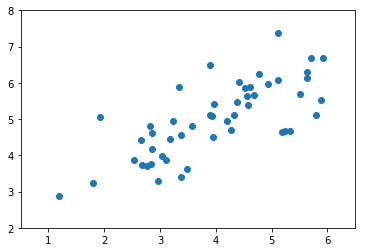

In [304]:
#InputData image & weights
input_data = scipy.io.loadmat(r"C:\Users\Yow-Gwo Wang\Desktop\ML\machine-learning-ex7\machine-learning-ex7\ex7\ex7data1.mat")
X = input_data['X']
plt.scatter(X[:,0],X[:,1])
plt.xlim([0.5,6.5])
plt.ylim([2,8])


In [305]:
def featureNormalize(Xin):
    col = Xin.shape[1]
    X_norm = Xin.copy()
    mu = np.zeros((col, 1))
    sigma = np.zeros((col, 1))
    
    for idx in range(col):
        mu[idx] = Xin[:,idx].mean()
        sigma[idx] = Xin[:,idx].std()
        X_norm[:,idx] = (Xin[:,idx] - Xin[:,idx].mean())/Xin[:,idx].std()

    return X_norm, mu, sigma

In [306]:
X_norm, mu, sigma = featureNormalize(X)
X_norm.shape

(50, 2)

In [127]:
def pca(X):
    m = X.shape[0]
    sigma = np.dot(X.transpose(),X)/m
    U,S,V = np.linalg.svd(sigma)
    return U, S

In [279]:
U, S = pca(X_norm)

In [301]:
a = mu
b = (mu + np.transpose(np.matrix((S[0]*U[:,0]))))
c = (mu + np.transpose(np.matrix((S[1]*U[:,1]))))

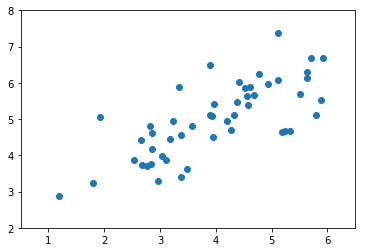

In [302]:
#compute eigenVector
plt.scatter(X[:,0],X[:,1])
plt.xlim([0.5,6.5])
plt.ylim([2,8])
plt.plot([a[0], b[0]],[a[1],b[1]], 'k')
plt.plot([a[0], c[0]],[a[1],c[1]], 'k')

In [282]:
def projectData(X, U, K):
    Z = np.zeros((X.shape[0], K))
    U_reduce = np.matrix(U[:, 0:K])
    Z = np.dot(X,U_reduce)
    return Z

In [283]:
Z = projectData(X_norm, U, 1)
print(X_norm.shape)
print(Z.shape)

(50, 2)
(50, 1)


In [284]:
def recoverData(Z, U, K):
    X_recov = np.zeros((X.shape[0], U.shape[0]))
    U_reduce = np.matrix(U[:, 0:K])
    X_recov = np.dot(Z, U_reduce.transpose())
    return X_recov

In [285]:
X_approx = recoverData(Z, U, 1)
X_approx[0]

matrix([[-1.05805279, -1.05805279]])

Text(0.5,1,'Black: original data | Red: Projection data')

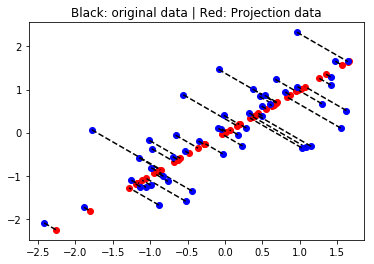

In [286]:
plt.plot(np.asarray(X_approx[:, 0]), np.asarray(X_approx[:, 1]),'ro')
for i in range(X_norm.shape[0]):
    plt.plot(np.asarray(X_norm[i, 0]), np.asarray(X_norm[i, 1]),'bo')
    plt.plot(np.asarray([X_norm[i, 0],X_approx[i, 0]]), np.asarray([X_norm[i, 1],X_approx[i, 1]]),'k--')
plt.title('Black: original data | Red: Projection data')

In [287]:
faces = scipy.io.loadmat(r"C:\Users\Yow-Gwo Wang\Desktop\ML\machine-learning-ex7\machine-learning-ex7\ex7\ex7faces.mat")
faces = faces['X']
faces.shape

(5000, 1024)

In [288]:
#To display image in nxn tile
def displayData(X):
    example_width = int(np.sqrt(X.shape[1]))
    example_height = int(np.sqrt(X.shape[1]))
    display_rows = int(np.sqrt(X.shape[0]))
    display_cols = int(np.sqrt(X.shape[0]))
    display_array = np.ones((example_height*display_rows, example_width*display_cols))
    count = 0
    for row in range(display_rows):
        for col in range(display_cols):
            to_plot = X[count]
            pic_max = np.max(to_plot)
            a = to_plot.reshape((example_width, example_height))/pic_max
            a = a.transpose()
            display_array[(row)*example_width:(row+1)*example_width,col*example_height:(col+1)*example_height ] = a
            count = count+1
    plt.imshow(display_array, cmap='gray')

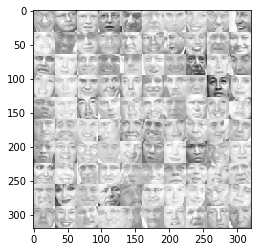

In [289]:
face100 = faces[0:100,:]
displayData(face100)

In [290]:
faces_norm, mu,_ = featureNormalize(faces)
U, S = pca(faces_norm)
Z = projectData(faces_norm, U, 100);
Z.shape

(5000, 100)

In [291]:
faces_rec  = recoverData(Z, U, 100)
faces_rec.shape

(5000, 1024)

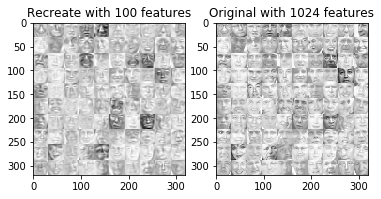

In [292]:
face100_rec = faces_rec[0:100,:]
plt.subplot(1,2,1)
plt.title('Recreate with 100 features')
displayData(face100_rec)
plt.subplot(1,2,2)
plt.title('Original with 1024 features')
displayData(face100)

